# Importing libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading iris dataset

In [25]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
x = iris_df.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Finding optimal number of clusters

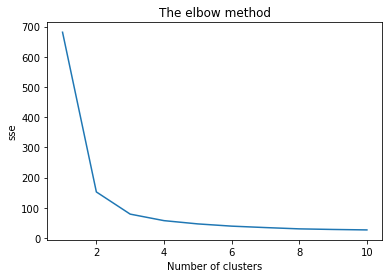

In [27]:
from sklearn.cluster import KMeans
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe the number for which error is minimum
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sse') # Within cluster sum of squares
plt.show()

We get optimal result for the value at which elbow occurs in the graph,so here we get elbow at n=3.
So we get optimal solution at n =3.

# Applying the algorithm for n =3 and visualizing the result

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

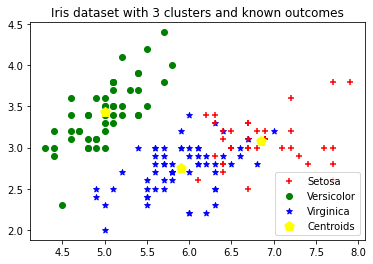

In [33]:

for i in range(0, len(x)):
    if y_kmeans[i] == 0:
        c1 = plt.scatter(x[i,0],x[i,1],c='r',
                marker='+')
    elif y_kmeans[i] == 1:
        c2 = plt.scatter(x[i,0],x[i,1],c='g',
                        marker='o')
    elif y_kmeans[i] == 2:
        c3 = plt.scatter(x[i,0],x[i,1],c='b',
                            marker='*')
c4 = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', marker= 'p')
plt.legend([c1, c2, c3,c4], ['Setosa', 'Versicolor',
    'Virginica','Centroids'])

plt.title('Iris dataset with 3 clusters and known outcomes')
plt.show()